In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [3]:
# Reading the train, test

df_train = pd.read_csv('train.csv',encoding='utf-8')
df_test = pd.read_csv('test.csv',encoding='utf-8')

In [8]:
df_train

,text,label
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",2
4,राम्रो भयो️️,1
...,...,...
5995,समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...,1
5996,"Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...",2
5997,यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...,2
5998,बधाई र सुभकामना ।।,1


In [9]:
df_test

,text,label
0,असाध्यै राम्रो कार्यक्रम आयोजना गरिएको छ हजुरह...,1
1,"राम्रो कार्यक्रम, पहिलो सिजनले समेटेको कार्यक्...",1
2,महानायक राजेश हमाल तपाई साँच्चै धन्यवादको पात्...,1
3,जातको प्रष्न बाट सबै जनालाई सकरात्मक सन्देश मि...,1
4,"बहसको सुरुवात भएको छ, अझै जोडदार रुपमा गर्नुपर...",1
...,...,...
1991,कस्ता कस्ता पागल memory king छन यार नेपालमा,0
1992,दोस्रो मूर्ख बिजय साही हो,0
1993,बिजय शाहीलाई किन निरुत्साहित गरेको त पुण्य गौत...,0
1994,यस्ता बिदेशी महादलालीहरु कहाँ गएर यो प्रश्नको ...,0


In [5]:
df_train['label'].value_counts()

1     2378
0     2377
2     1236
-        5
20       1
11       1
o        1
--       1
Name: label, dtype: int64

In [6]:
df_test['label'].value_counts()

1    888
0    610
2    496
o      1
-      1
Name: label, dtype: int64

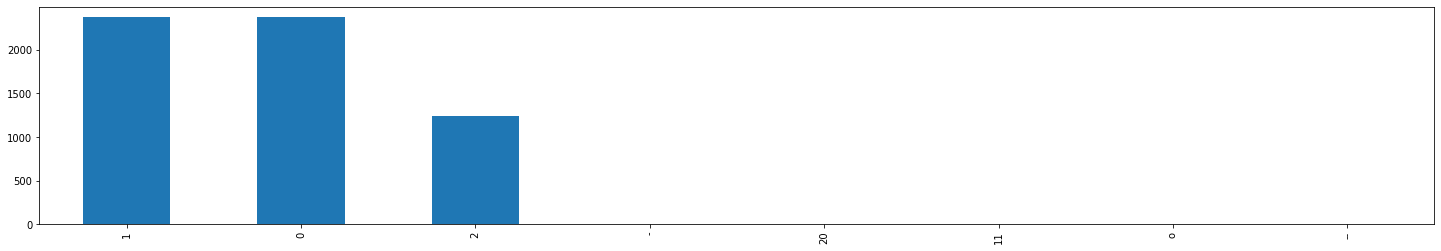

In [7]:
plt.figure(figsize=(25,4))
df_train['label'].value_counts().plot(kind='bar')
plt.axis()
plt.show()

In [9]:
df_train['label'].value_counts().shape

(8,)

In [10]:
df_train=df_train.dropna()
df_test=df_test.dropna()

In [11]:
df_train.drop(df_train[df_train['label'] == '-'].index, inplace = True)
df_train.drop(df_train[df_train['label'] == '20'].index, inplace = True)
df_train.drop(df_train[df_train['label'] == '11'].index, inplace = True)
df_train.drop(df_train[df_train['label'] == 'o'].index, inplace = True)
df_train.drop(df_train[df_train['label'] == '--'].index, inplace = True)

In [12]:
df_test.drop(df_test[df_test['label'] == '-'].index, inplace = True)
df_test.drop(df_test[df_test['label'] == 'o'].index, inplace = True)

In [6]:
df_test['label'].value_counts()

1    888
0    609
2    496
Name: label, dtype: int64

In [7]:
df_train['label'].value_counts()

1    2378
0    2376
2    1236
Name: label, dtype: int64

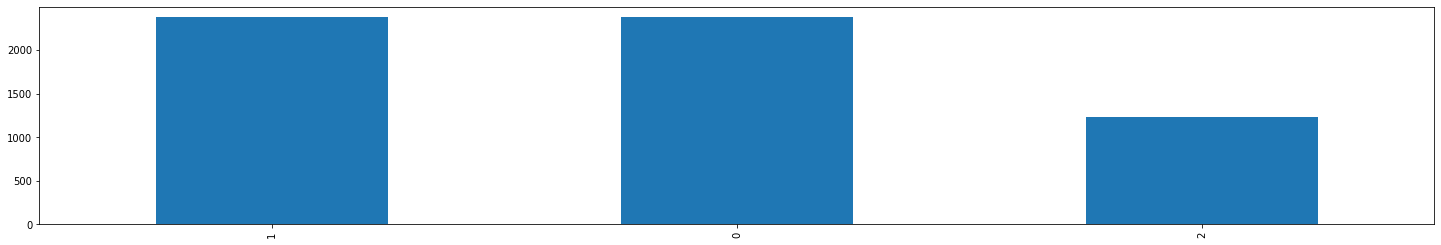

In [15]:
plt.figure(figsize=(25,4))
df_train['label'].value_counts().plot(kind='bar')
plt.axis()
plt.show()

In [31]:
X_train, y_train = df_train['text'],df_train['label']
X_test, y_test = df_test['text'],df_test['label']

In [9]:
import re
import pickle
from emot.emo_unicode import *

# 'Emoji_Dict.p'- download link https://drive.google.com/open?id=1G1vIkkbqPBYPKHcQ8qy0G2zkoab2Qv4v
with open('Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)
Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}


def convert_emojis_to_word(text):
    for emot in Emoji_Dict:
        text = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(",","").replace(":","").split()), text)
    return text

In [10]:
X_TRAIN=[]
Y_TRAIN=[]

for i in range(len(X_train)):
    if(i==3869):
        print(i)
    else:
        test=convert_emojis_to_word(X_train[df_train.index[i]])
        X_TRAIN.append(test)
        trainy= y_train[df_train.index[i]]
        Y_TRAIN.append(trainy)
    

3869


In [11]:
len(Y_TRAIN)

5989

In [12]:
len(X_TRAIN)

5989

In [38]:
#X_TRAIN[3869]

'लामो प्रतीक्षा पछि आज रबि दाइलाइ सिधा कुरा कार्यक्रममा देख्दा खुसी लाग्यो । smiling_face_with_heart-eyessmiling_face_with_heart-eyessmiling_face_with_heart-eyessmiling_face_with_heart-eyes'

In [39]:
#X_train[df_train.index[3870]]

'लामो प्रतीक्षा पछि आज रबि दाइलाइ सिधा कुरा कार्यक्रममा देख्दा खुसी लाग्यो । 😍😍😍😍'

In [48]:
#convert_emojis_to_word(X_train[df_train.index[3870]])

'लामो प्रतीक्षा पछि आज रबि दाइलाइ सिधा कुरा कार्यक्रममा देख्दा खुसी लाग्यो । smiling_face_with_heart-eyessmiling_face_with_heart-eyessmiling_face_with_heart-eyessmiling_face_with_heart-eyes'

In [13]:
X_TEST=[]
Y_TEST=[]


for i in range(len(X_test)):
  if(i==972):
    print(i)
  else:
    test=convert_emojis_to_word(X_test[df_test.index[i]])
    X_TEST.append(test)
    testy= y_test[df_test.index[i]]
    Y_TEST.append(testy)

972


In [15]:
X_TRAIN[4484]

'कहिल्यै पनि राम्रो अभिभावक पायन अझै कति झुर हुनै बाकी छ'

In [14]:
Y_TRAIN[4484]

'0'

In [19]:
X_test

0       असाध्यै राम्रो कार्यक्रम आयोजना गरिएको छ हजुरह...
1       राम्रो कार्यक्रम, पहिलो सिजनले समेटेको कार्यक्...
2       महानायक राजेश हमाल तपाई साँच्चै धन्यवादको पात्...
3       जातको प्रष्न बाट सबै जनालाई सकरात्मक सन्देश मि...
4       बहसको सुरुवात भएको छ, अझै जोडदार रुपमा गर्नुपर...
                              ...                        
1991          कस्ता कस्ता पागल memory king छन यार नेपालमा
1992                            दोस्रो मूर्ख बिजय साही हो
1993    बिजय शाहीलाई किन निरुत्साहित गरेको त पुण्य गौत...
1994    यस्ता बिदेशी महादलालीहरु कहाँ गएर यो प्रश्नको ...
1995     बुढा खालहरूमा बाँकि रहेको नेताहरुमा बाबुराम ज...
Name: text, Length: 1994, dtype: object

In [20]:
X_train

0       बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...
1       1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...
2       होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...
3       खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...
4                                            राम्रो भयो️️
                              ...                        
5995    समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...
5996    Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...
5997    यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...
5998                                   बधाई र सुभकामना ।।
5999        कार्यक्रम एकदमै सकारात्मक छ। निरन्तरता पाओस्।
Name: text, Length: 5991, dtype: object

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/sumit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
!ls /home/sumit/nltk_data/corpora/stopwords

arabic	     dutch    german	  italian    portuguese  slovene  turkish
azerbaijani  english  greek	  kazakh     README	 spanish
bengali      finnish  hungarian   nepali     romanian	 swedish
danish	     french   indonesian  norwegian  russian	 tajik


In [32]:
X_train=X_train.values.astype('U')
X_test=X_test.values.astype('U')

In [25]:
#X_train

0       बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...
1       1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...
2       होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...
3       खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...
4                                            राम्रो भयो️️
                              ...                        
5995    समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...
5996    Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...
5997    यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...
5998                                   बधाई र सुभकामना ।।
5999        कार्यक्रम एकदमै सकारात्मक छ। निरन्तरता पाओस्।
Name: text, Length: 5991, dtype: object

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

#stopwords_list = stopwords.words('english') + stopwords.words('nepali')

stopWords = set(nltk.corpus.stopwords.words('nepali'))

cv_doc = CountVectorizer(max_features=20000,stop_words=stopWords ,ngram_range=(1,1), min_df=3,encoding='utf-8')
cv_vector = cv_doc.fit(X_train)

In [10]:
! wget https://raw.githubusercontent.com/sndsabin/Nepali-News-Classifier/master/nepali

--2022-02-18 14:37:48--  https://raw.githubusercontent.com/sndsabin/Nepali-News-Classifier/master/nepali
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3613 (3.5K) [text/plain]
Saving to: ‘nepali’

nepali              100%[===================>]   3.53K  --.-KB/s    in 0s      

2022-02-18 14:37:48 (37.1 MB/s) - ‘nepali’ saved [3613/3613]



In [21]:
from nltk.corpus import stopwords
#from nltk import TweetTokenizer
#tokenizer = TweetTokenizer()

In [34]:
stopWords = nltk.corpus.stopwords.words('nepali') + stopwords.words('english') + nltk.corpus.stopwords.words('/home/sumit/Documents/nepali sentiment classifier/hindi')

tfidfVectorizer = TfidfVectorizer(max_features=50000,tokenizer=lambda x: x.split(" ") ,sublinear_tf=True, encoding='utf-8',decode_error='ignore',ngram_range=(1, 1),stop_words=stopWords)

vectorised = tfidfVectorizer.fit(X_train)


In [35]:
'''X_train = vectorised.transform(X_TRAIN)
X_test= vectorised.transform(X_TEST)'''

X_train = vectorised.transform(X_train)
X_test= vectorised.transform(X_test)

In [136]:
from gensim.models import Word2Vec, KeyedVectors
#model = Word2Vec(X_train, size=1000, min_count=5, window=10, sg=0, workers=10)
#print("Vocabulary dimension", model.vector_size)
#print("Number of words in vocab", len(model.wv.vocab))

In [137]:
#model.wv.most_similar('न', topn=10)

In [33]:
#X_train = cv_vector.transform(X_train)
#X_test= cv_vector.transform(X_test)

In [74]:
X_train

<5990x15283 sparse matrix of type '<class 'numpy.float64'>'
	with 65424 stored elements in Compressed Sparse Row format>

In [36]:
'''label_encoder = LabelEncoder().fit(Y_TRAIN)

y_train = label_encoder.transform(Y_TRAIN)
y_test = label_encoder.transform(Y_TEST)'''

label_encoder = LabelEncoder().fit(y_train)

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [37]:
from sklearn.svm import LinearSVC
clf=LinearSVC(loss='hinge',random_state=0,max_iter=10000,penalty='l2')
clf.fit(X_train, y_train)    # training model on train data

clfval = clf.predict(X_test)   # predicting test data
print('F1 Score : {}'.format(f1_score(y_test, clfval, average='micro')))  # printing F1 score 


F1 Score : 0.5885599598595083


In [124]:
from sklearn.svm import SVC
clf=SVC(kernel='linear',random_state=0,max_iter=10000)
clf.fit(X_train, y_train)    # training model on train data

clfval = clf.predict(X_test)   # predicting test data
print('F1 Score : {}'.format(f1_score(y_test, clfval, average='micro')))  # printing F1 score 


F1 Score : 0.5790265930757652


In [24]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB(alpha=1.62,fit_prior=False)
nb.fit(X_train,y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % f1_score(y_test, y_pred,average='micro'))

accuracy 0.5913654618473896


In [126]:
from sklearn.linear_model import LogisticRegression
lrr=LogisticRegression(solver='saga', n_jobs=1, C=1e5)
lrr.fit(X_train, y_train)
lrrval = lrr.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, lrrval, average='micro')))

F1 Score : 0.562468640240843


/home/sumit/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [127]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(alpha=0.9,fit_prior=False)
clf.fit(X_train, y_train)
clfval = clf.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, clfval, average='micro')))

F1 Score : 0.5664826894129453


In [128]:
from sklearn.naive_bayes import ComplementNB
cllf = ComplementNB(alpha=1.0, fit_prior=False,norm=True)
cllf.fit(X_train, y_train)
cllfval = clf.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, cllfval, average='micro')))

F1 Score : 0.5664826894129453


In [129]:
from sklearn.linear_model import PassiveAggressiveClassifier
cclf = PassiveAggressiveClassifier(max_iter=2500, random_state=43,tol=1e-5)
cclf.fit(X_train, y_train)

cllfval = cclf.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, cllfval, average='micro')))

F1 Score : 0.564977420973407


In [84]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.2,max_depth=10, random_state=0).fit(X_train, y_train)

gbpred=clf.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, gbpred, average='micro')))

F1 Score : 0.5037631710988459


In [85]:

from sklearn.linear_model import Perceptron

percept = Perceptron(alpha=0.00001, tol=1e-6, penalty='l2', random_state=1, max_iter=3000)
percept = percept.fit(X_train, y_train)

cpfval = percept.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, cpfval, average='micro')))

F1 Score : 0.5363773206221776


In [130]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=150, random_state=2,max_features='sqrt',class_weight='balanced')
clf.fit(X_train, y_train)

pred=clf.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, pred, average='micro')))

F1 Score : 0.5730055193176117


              precision    recall  f1-score   support

           0       0.49      0.76      0.59       609
           1       0.72      0.73      0.72       887
           2       0.49      0.14      0.22       496

    accuracy                           0.59      1992
   macro avg       0.56      0.54      0.51      1992
weighted avg       0.59      0.59      0.56      1992



<AxesSubplot:>

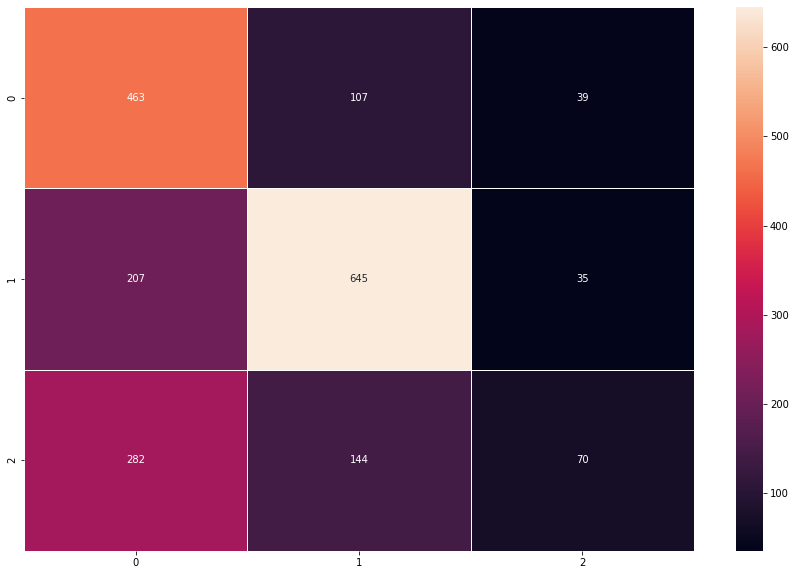

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#countvector
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')

In [29]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [50]:
def sampling_strategy(y,n_samples, t='majority'):
    target_classes = ''
    if t == 'majority':
        target_classes = {k:v for k,v in dict(Counter(y)).items() if v > n_samples}
    elif t == 'minority':
        # Since SMOTE depends on KNN, filtering out those samples that occur less than 10 times
        target_classes = {k:v for k,v in dict(Counter(y)).items() if v < n_samples and v > 1236}
    sampling_strategy = {k:n_samples for k,v in target_classes.items()}
    return sampling_strategy

In [51]:
over_sampler_ss = sampling_strategy(y_train,1000,t='minority')
under_sampler_ss = sampling_strategy(y_train,8000,t='majority')
over = SMOTE(sampling_strategy=over_sampler_ss)
under = RandomUnderSampler(sampling_strategy=under_sampler_ss, random_state=42)

In [52]:
X_over, y_over = over.fit_resample(X_train, y_train)

In [53]:
X_over

<5989x15247 sparse matrix of type '<class 'numpy.float64'>'
	with 65146 stored elements in Compressed Sparse Row format>

In [35]:
len(y_over)

5989

In [54]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB(alpha=1.62,fit_prior=False)
nb.fit(X_over,y_over)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % f1_score(y_test, y_pred,average='micro'))

accuracy 0.5913654618473896
